In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns


**Load the model**

In [2]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/2"

print("Loading model from {}".format(module_url))
embed = hub.Module(module_url)

Loading model from https://tfhub.dev/google/universal-sentence-encoder/2
INFO:tensorflow:Using /tmp/tfhub_modules to cache modules.


**Embed Messages using Encoder**

In [3]:
word = "Elephant"
sentence = "I am a sentence for which I would like to get its embedding."
paragraph = (
            "Universal Sentence Encoder embeddings also support short paragraphs. "
                "There is no hard limit on how long the paragraph is. Roughly, the longer "
                    "the more 'diluted' the embedding will be.")
messages = [word, sentence, paragraph]

**Tensorflow part**

In [4]:
with tf.Session() as session:
  session.run([tf.global_variables_initializer(), tf.tables_initializer()])
  message_embeddings = session.run(embed(messages))
 
  for i, message_embedding in enumerate(np.array(message_embeddings).tolist()):
    print("Message: {}".format(messages[i]))
    print("Embedding size: {}".format(len(message_embedding)))
    message_embedding_snippet = ", ".join(
        (str(x) for x in message_embedding[:3]))
    print("Embedding: [{}, ...]\n".format(message_embedding_snippet))

INFO:tensorflow:Saver not created because there are no variables in the graph to restore
Message: Elephant
Embedding size: 512
Embedding: [-0.016987282782793045, -0.008949815295636654, -0.0070627182722091675, ...]

Message: I am a sentence for which I would like to get its embedding.
Embedding size: 512
Embedding: [0.03531332314014435, -0.025384284555912018, -0.007880025543272495, ...]

Message: Universal Sentence Encoder embeddings also support short paragraphs. There is no hard limit on how long the paragraph is. Roughly, the longer the more 'diluted' the embedding will be.
Embedding size: 512
Embedding: [0.01879097707569599, 0.045365191996097565, -0.02001088112592697, ...]



**Process the script**

In [3]:
import re
script_processed = open("script-processed",'w')
with open("script-raw",'r') as script_raw:
    for line in script_raw.readlines():
        x = re.sub("[\(\[].*?[\)\]]", "", line)
        x = x.strip()
        script_processed.write("{}\n".format(x))
script_processed.close()


**Get dialogues from script**

In [4]:
chars = []
file_handles = {}
script = open("script-processed",'r')
for line in script.readlines():
    line.strip()
    if line=="":
        continue
    else:
        try:
            if ":" not in line:
                continue
            character = line.split(":")[0]
            newline = " ".join(line.split(":")[1:])
            if len(character.split())>2:
                print(line,character)
                input()
            #print(line,character)
            #input()
            if character=="":
                continue
            elif character in chars:
                file_handles[character].write("{}\n".format(newline.strip()))
            else:
                chars.append(character)
                file_handles[character] = open(character+".txt",'w')
                file_handles[character].write("{}\n".format(newline.strip()))
        except:
            print("Unknown error. Skipping line...")

#print("Files written for:\n{}".format("\n".join(chars)))


Your Bus Driver, Stan Lee: What's the matter with you kids? You've never seen a spaceship before?
 Your Bus Driver, Stan Lee

Child of Thanos:
 Child of Thanos

Tony Stark and Drax: Quill!
 Tony Stark and Drax



**Plotting Similarity Matrix Functions**

In [5]:
def plot_similarity(labels, features, rotation):
    corr = np.inner(features, features)
    sns.set(font_scale=1.2)
    g = sns.heatmap(corr,\
        #xticklabels=labels,\
        #yticklabels=labels,\
        vmin=0,\
        vmax=1,\
        cmap="YlOrRd")
    #g.set_xticklabels(labels, rotation=rotation)
    g.set_title("Semantic Textual Similarity")
    #figure = g.get_figure()
    plt.tight_layout()
    plt.savefig("Avenger-semantic-similarity.png")
    plt.show()

def run_and_plot(session_, input_tensor_, messages_, labels_, encoding_tensor):
    message_embeddings_ = session_.run(encoding_tensor, feed_dict={input_tensor_: messages_})
    plot_similarity(labels_, message_embeddings_, 90)

**Perform Semantic Similarity Analysis**

In [6]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/2"

print("Loading model from {}".format(module_url))
embed = hub.Module(module_url)
file_path = "./Avengers-Similarity-Analysis"
text_files = [os.path.join(file_path, f) for f in os.listdir(file_path) if f.endswith(".txt")]

Loading model from https://tfhub.dev/google/universal-sentence-encoder/2
INFO:tensorflow:Using /tmp/tfhub_modules to cache modules.


**Read these files**

In [7]:
#characters = [i[:-4] for i in text_files]
character_lines = {}

print("Reading data from files...")

for fname in text_files:
    character = fname[:-4]
    print("Reading file for {}".format(character))
    character_line = ""
    with open(fname,'r') as g:
        for line in g.readlines():
            character_line+=line.strip()
        if character_line == "":
            continue
        character_lines[character]=character_line

Reading data from files...
Reading file for ./Avengers-Similarity-Analysis/Wong
Reading file for ./Avengers-Similarity-Analysis/Collector
Reading file for ./Avengers-Similarity-Analysis/Secretary Ross
Reading file for ./Avengers-Similarity-Analysis/Thanos
Reading file for ./Avengers-Similarity-Analysis/Eitri
Reading file for ./Avengers-Similarity-Analysis/Bucky Barnes
Reading file for ./Avengers-Similarity-Analysis/Ebony Maw
Reading file for ./Avengers-Similarity-Analysis/James Rhodes
Reading file for ./Avengers-Similarity-Analysis/Proxima Midnight
Reading file for ./Avengers-Similarity-Analysis/Pepper Potts
Reading file for ./Avengers-Similarity-Analysis/Jabari Warriors
Reading file for ./Avengers-Similarity-Analysis/Tony Stark
Reading file for ./Avengers-Similarity-Analysis/Bruce Banner
Reading file for ./Avengers-Similarity-Analysis/Nick Fury
Reading file for ./Avengers-Similarity-Analysis/Nebula
Reading file for ./Avengers-Similarity-Analysis/Steve Rogers
Reading file for ./Avenger

In [8]:
# Select characters
print("================================")
print("Characters found:")
for i in range(len(character_lines.keys())):
    print("{}: {}".format(i,list(character_lines.keys())[i]))
print("================================")
print("Enter character index to be used:")
print("Enter q or Q to stop.")
flag = True
char_index = ""
final_character_lines = {}
characters = list(character_lines.keys())

while flag:
    char_index = input()
    if char_index.upper() == 'Q':
        flag=False
    else:
        char_index = int(char_index)
        final_character_lines[characters[char_index]]=character_lines[characters[char_index]]

# Index changed
if flag == True:
    character_lines = final_character_lines

print("================================")
print("Characters selected:")
for i in range(len(character_lines.keys())):
    print("{}: {}".format(i,list(character_lines.keys())[i]))
print("================================")


Characters found:
0: ./Avengers-Similarity-Analysis/Doctor Strange
1: ./Avengers-Similarity-Analysis/Gamora
2: ./Avengers-Similarity-Analysis/Wanda Maximoff
3: ./Avengers-Similarity-Analysis/Eitri
4: ./Avengers-Similarity-Analysis/Young Gamora
5: ./Avengers-Similarity-Analysis/Proxima Midnight
6: ./Avengers-Similarity-Analysis/Nebula
7: ./Avengers-Similarity-Analysis/Bruce Banner
8: ./Avengers-Similarity-Analysis/F.R.I.D.A.Y
9: ./Avengers-Similarity-Analysis/Collector
10: ./Avengers-Similarity-Analysis/Heimdall
11: ./Avengers-Similarity-Analysis/Gamora's Mother
12: ./Avengers-Similarity-Analysis/Shuri
13: ./Avengers-Similarity-Analysis/Loki
14: ./Avengers-Similarity-Analysis/Drax
15: ./Avengers-Similarity-Analysis/Peter Parker
16: ./Avengers-Similarity-Analysis/Secretary Ross
17: ./Avengers-Similarity-Analysis/Maria Hill
18: ./Avengers-Similarity-Analysis/Sam Wilson
19: ./Avengers-Similarity-Analysis/Stonekeeper
20: ./Avengers-Similarity-Analysis/M'Baku
21: ./Avengers-Similarity-Analys

**Drawing**

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


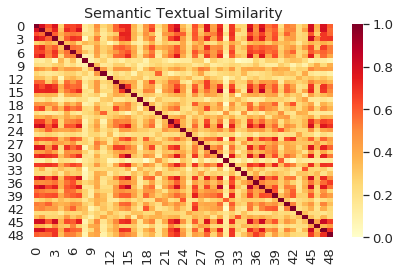

In [9]:
similarity_input_placeholder = tf.placeholder(tf.string, shape=(None))
similarity_message_encodings = embed(similarity_input_placeholder)
#similarity_labels_placeholder= tf.placeholder(
with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    session.run(tf.tables_initializer())
    run_and_plot(session, similarity_input_placeholder,\
            list(character_lines.values()),\
            list(character_lines.keys()),\
            similarity_message_encodings)